In [32]:
using Printf
fix_e(x, dig = 6) = replace(string(round(x, sigdigits = dig)), r"e\+00" => "", r"e(-\d+)" => s" dot 10^(\1)", r"e\+?(\d+)" => s" dot 10^(\1)")

fix_e (generic function with 2 methods)

In [72]:
include("./SzukaczZer.jl")
using .SzukaczZer

In [7]:
f(x) = (x-1)*(x-2)*(x-3) + 1 # x^3 - 6x^2 + 11x - 5
fp(x) = 3x^2 - 12x + 11

println(mstycznych(f, fp, 2.5, 0.5e-5, 0.5e-5, 100))

(0.6752812113847432, -3.5454928615230585e-6, 18, 0)


In [8]:
f(x) = log(x)
fp(x) = 1 / x

println(mstycznych(f, fp, prevfloat(Float64(ℯ)), 0.5e-20, 0.5e-5, 100))
#println(mbisekcji(f, 0.01, 200.0, 0.5e-5, 0.5e-5))

(0.9999997591537222, -2.40846306813761e-7, 18, 0)


In [9]:
f(x) = sin(x) - (x/2)^2
fp(x) = cos(x) - x/2

println(mbisekcji(f, 1.5, 2.0, 0.5e-5, 0.5e-5))
println(mstycznych(f, fp, 1.5, 0.5e-5, 0.5e-5, 100))
println(msiecznych(f, 1.0, 2.0, 0.5e-5, 0.5e-5, 10))

(1.9337539672851562, -2.7027680138402843e-7, 16, 0)
(1.933753779789742, -2.2423316314856834e-8, 4, 0)
(1.933753644474301, 1.564525129449379e-7, 4, 0)


In [10]:
f(x) = ℯ^x - 3x

mbisekcji(f,0.0,1.0,1e-4,1e-4)

(0.619140625, -9.066320343276146e-5, 9, 0)

In [11]:
f(x) = ℯ^(1 - x) - 1
fp(x) = -ℯ^(1 - x)

# println(mbisekcji(f, 0.0, 3.0, 1e-5, 1e-5))
# println(mstycznych(f, fp, 0.5, 1e-5, 1e-5, 10))
# println(mstycznych(f, fp, 1.5, 1e-5, 1e-5, 10))
# println(msiecznych(f, -0.5, 0.5, 1e-5, 1e-5, 10))
# println(msiecznych(f,  2.0, 3.0, 1e-5, 1e-5, 10))
println(mstycznych(f, fp, 7.65, 1e-5, 1e-5, 100))

(NaN, NaN, 100, 1)


In [12]:
f(x) = x*ℯ^(-x)
fp(x) = (ℯ^(-x)) * (1 - x)

println(mbisekcji(f, -1.0, 2.0, 1e-5, 1e-5))
println(mstycznych(f, fp, 0.5, 1e-5, 1e-5, 10))
println(mstycznych(f, fp, 1.0, 1e-5, 1e-5, 10))
println(mstycznych(f, fp, 1.1, 1e-5, 1e-5, 10))
println(msiecznych(f,  0.5, 0.7, 1e-5, 1e-5, 10))
println(msiecznych(f,  1.5, 2.0, 1e-5, 1e-5, 10))

(7.62939453125e-6, 7.62933632381113e-6, 17, 0)
(-3.0642493416461764e-7, -3.0642502806087233e-7, 5, 0)
(NaN, NaN, 10, 2)
(14.272123938290509, 9.040322779745447e-6, 3, 0)
(-3.9239972206464417e-7, -3.9239987604221625e-7, 8, 0)
(11.341330397463748, 0.00013464393437784763, 10, 1)


In [13]:
using .SzukaczZer

In [14]:
function mbisekcji_arr(f, a::Float64, b::Float64, delta::Float64, epsilon::Float64) 
    left_val = f(a)
    right_val = f(b)
    if sign(left_val) == sign(right_val) 
        return (0,0,0,1)
    end

    l_arr = []
    r_arr = []
    m_arr = []

    iter_count = 0
    while true
        iter_count += 1

        half_inter = (b - a) / 2
        middle = a + half_inter

        push!(l_arr, a)
        push!(r_arr, b)
        push!(m_arr, middle)

        middle_val = f(middle)
        if abs(half_inter) < delta || abs(middle_val) < epsilon
            return (l_arr, m_arr, r_arr)
        end
        
        if sign(middle_val) != sign(left_val) 
            b = middle
            right_val = middle_val
        else 
            a = middle
            left_val = middle_val
        end
    end
end

mbisekcji_arr (generic function with 1 method)

In [15]:
using Plots
using LaTeXStrings

MAX_INTS = 8
ANNOTATE_INTS = 5

function mbisekcji_plot(f, a, b, from_top, a_view, b_view, plt = nothing; annotate_ints = ANNOTATE_INTS)
    rang = range(a_view,b_view, 100)

    l_arr, m_arr, r_arr = mbisekcji_arr(f, a, b, 1e-5, 1e-5)

    if plt == nothing
        plt = plot(legend = false, framestyle = :semi)
    end

    plot!(plt, rang, f.(rang), lc = :blue)

    ints = min(length(l_arr), MAX_INTS)

    if from_top
        ints_range = reverse(range(0.0, 3.0 * ylims(plt)[2] / 4.0, ints))
    else
        ints_range = range(3.0 * ylims(plt)[1] / 4.0, 0.0, ints)
    end

    plot!(plt, [a_view,b_view], [0, 0], ls = :dash, lc = :black)

    plot_width = xlims(plt)[2] - xlims(plt)[1]

    for i in 1:ints
        plot!(plt, [l_arr[i], r_arr[i]], [ints_range[i], ints_range[i]], lw = 1, lc = :black, mc = :black, shape = :vline)
        if (i <= annotate_ints)
            annotate!(l_arr[i] - plot_width/40.0, ints_range[i], L"a_{%$i}")
            annotate!(r_arr[i] + plot_width/40.0, ints_range[i], L"b_{%$i}")
        end
        plot!(plt, [l_arr[i], l_arr[i]], [0.0, ints_range[i]], lw = 0.5, ls = :dash, lc = :black)
        plot!(plt, [r_arr[i], r_arr[i]], [0.0, ints_range[i]], lw = 0.5, ls = :dash, lc = :black)
        plot!(plt, [m_arr[i]], [ints_range[i]], shape = :circle, mc = :black, ms = 2)
    end

    #plot!(plt, [m_arr[end]], [0.0], shape = :rect, mc = :red, ms = 3, msw = 0)

    return plt
end

mbisekcji_plot (generic function with 2 methods)

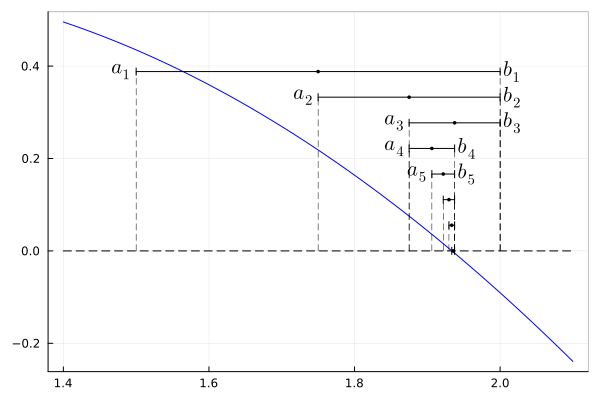

In [16]:
f(x) = sin(x) - (x/2)^2

plt = mbisekcji_plot(f,1.5,2.0,true,1.4,2.1)

savefig(plt, "./plots/bis_sinx-x^2.svg")

display(plt)

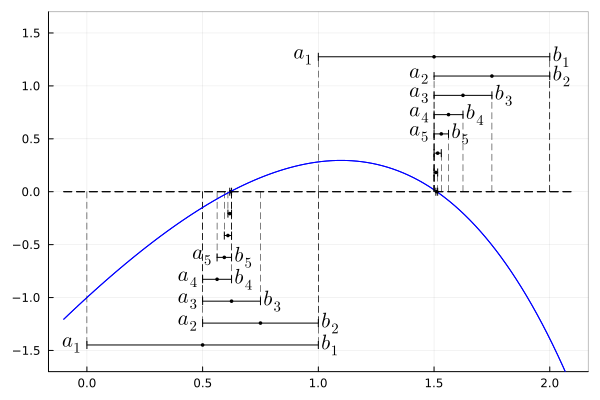

"/home/dawiderter/Projects/Studies/scientific_computing/lista_3/plots/bis_3x-ex.svg"

In [39]:
f(x) = 3x - ℯ^x

plt = mbisekcji_plot(f,0.0,1.0,false,-0.1,2.1)

ylims!(plt, -1.7, 1.7)

mbisekcji_plot(f,1.0,2.0,true,-0.1,2.1, plt)

display(plt)
savefig(plt, "./plots/bis_3x-ex.svg")

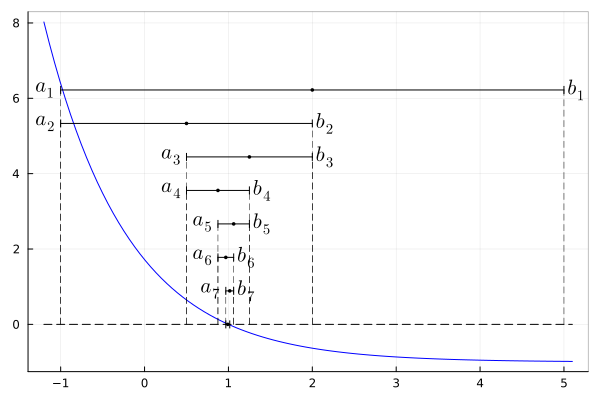

In [18]:
f(x) = ℯ^(1-x) - 1

mbisekcji_plot(f,-1.0,5.0,true,-1.2,5.1,annotate_ints = 7)

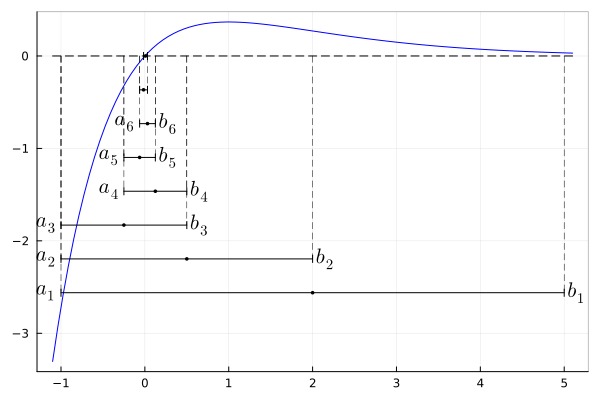

In [19]:
f(x) = x * ℯ^(-x)

mbisekcji_plot(f,-1.0,5.0,false, -1.1, 5.1, annotate_ints = 6)

In [36]:
function mstycznych_arr(f, pf, x0::Float64, delta::Float64, epsilon::Float64, maxit::Int)
    x_arr = []

    val = f(x0)
    if abs(val) < epsilon
        return x_arr
    end

    error_code = 0

    x = x0
    for it in 1:maxit
        push!(x_arr, x)

        d = pf(x)

        if abs(d) < epsilon
            error_code = 2
        end

        x_next = x - val / d
        val = f(x_next)
        if abs(x_next - x) < delta || abs(val) < epsilon
            push!(x_arr, x_next)
            return x_arr
        end
        x = x_next
    end

    return x_arr
end

mstycznych_arr (generic function with 1 method)

In [21]:
using Plots

function mstycznych_plot(f, fp, x_0, a, b, max_it, plt = nothing)
    rang = range(a,b, 100)

    x_arr = mstycznych_arr(f, fp, x_0, 1e-5, 1e-5, 10)

    if plt == nothing
        plt = plot(legend = false, framestyle = :semi)
        plot!(plt, [a,b], [0, 0], ls = :dash, lc = :black)
    end

    plot!(plt, rang, f.(rang), lc = :blue)

    its = min(length(x_arr), max_it)

    plot_height = ylims(plt)[2] - ylims(plt)[1]
    plot_width = xlims(plt)[2] - xlims(plt)[1]

    plot_max = ylims(plt)[2]
    plot_min = ylims(plt)[1]

    for i in 1:(its-1)
        if i < its
            plot!(plt, [x_arr[i], x_arr[i+1]], [f(x_arr[i]), 0.0], lw = 2, lc = :red, shape = :circle, mc = :red, msw = 0, ms = 2)
        end
        # plot!(plt, [x_arr[i], x_arr[i]], [0.0, f(x_arr[i])], lw = 0.5, ls = :dash, lc = :red)
        if i % 2 == 0
            diff = 1
        else 
            diff = -1
        end

        plot!(plt, [x_arr[i], x_arr[i]], [plot_min + plot_height/10.0, plot_max - plot_height/10.0], lw = 0.5, ls = :dash, lc = :black)
        annotate!(x_arr[i] - diff * plot_width/30.0, plot_max - plot_height/10.0, L"x_{%$(i-1)}")

        # plot!(plt, [l_arr[i], r_arr[i]], [ints_range[i], ints_range[i]], lw = 1, lc = :black, mc = :black, shape = :vline)
        # plot!(plt, [r_arr[i], r_arr[i]], [0.0, ints_range[i]], lw = 0.5, ls = :dash, lc = :black)
        # plot!(plt, [m_arr[i]], [ints_range[i]], shape = :circle, mc = :black, ms = 2)
    end

    #plot!(plt, [m_arr[end]], [0.0], shape = :rect, mc = :red, ms = 3, msw = 0)

    return plt
end

mstycznych_plot (generic function with 2 methods)

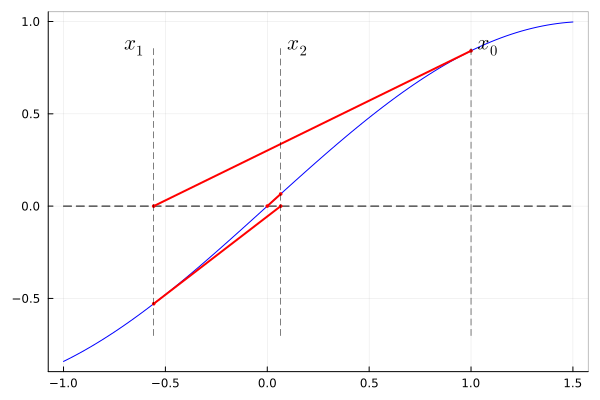

"/home/dawiderter/Projects/Studies/scientific_computing/lista_3/plots/newt_sinx.svg"

In [22]:
f(x) = sin(x)
fp(x) = cos(x)

plt = mstycznych_plot(f,fp,1.0,-1.0,1.5,4)
display(plt)
savefig(plt, "./plots/newt_sinx.svg")

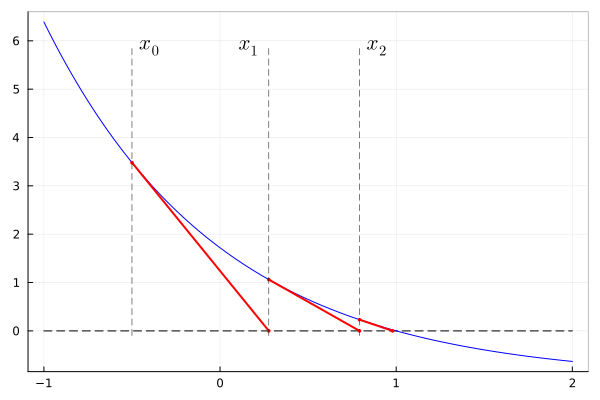

In [95]:
f(x) = ℯ^(1-x) - 1
fp(x) = -ℯ^(1 - x)

mstycznych_plot(f,fp,-0.5,-1.0,2.0,4)

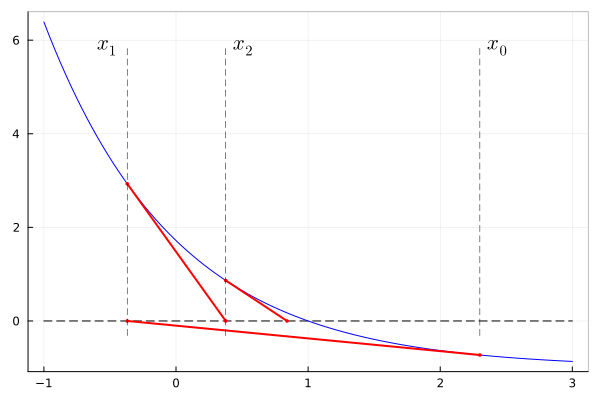

"/home/dawiderter/Projects/Studies/scientific_computing/lista_3/plots/newt_e1-x.svg"

In [104]:
f(x) = ℯ^(1-x) - 1
fp(x) = -ℯ^(1 - x)

plt = mstycznych_plot(f,fp,2.3,-1.0,3.0,4)
display(plt)
savefig(plt, "./plots/newt_e1-x.svg")

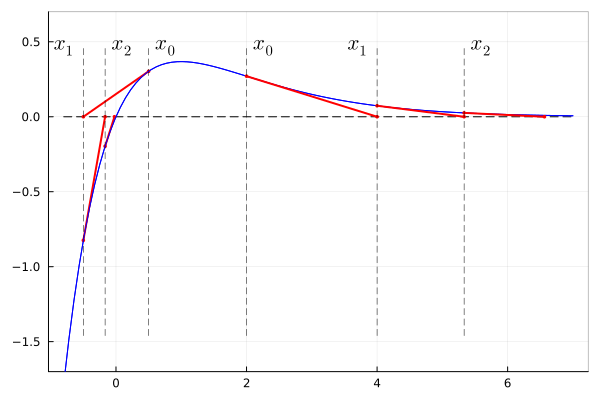

"/home/dawiderter/Projects/Studies/scientific_computing/lista_3/plots/newt_xe-x.svg"

In [118]:
f(x) = x*ℯ^(-x)
fp(x) = (ℯ^(-x)) * (1 - x)

plt = plot(legend = false, framestyle = :semi)
ylims!(plt,-1.7, 0.7)
plot!(plt, [-0.8,7.0], [0, 0], ls = :dash, lc = :black)
mstycznych_plot(f, fp, 0.5, -0.8, 7.0, 4, plt)
mstycznych_plot(f, fp, 2.0, -0.8, 7.0, 4, plt)

display(plt)
savefig(plt, "./plots/newt_xe-x.svg")

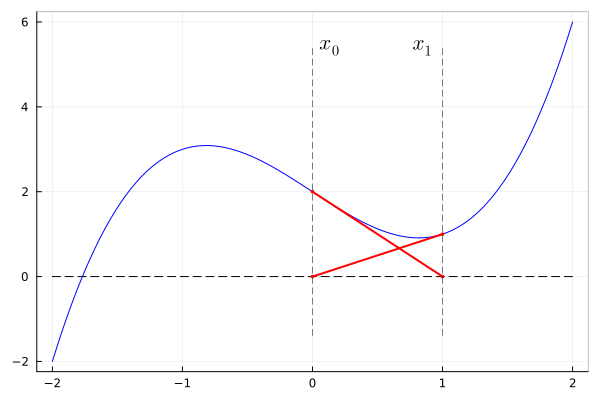

"/home/dawiderter/Projects/Studies/scientific_computing/lista_3/plots/newt_cykl.svg"

In [25]:
f(x) = x^3 - 2x + 2
fp(x) = 3x^2 - 2
plt = mstycznych_plot(f, fp, 0.0, -2.0, 2.0, 3)

display(plt)
savefig(plt, "./plots/newt_cykl.svg")

In [35]:
function msiecznych_arr(f, x0::Float64, x1::Float64, delta::Float64, epsilon::Float64, maxit::Int)
    fa = f(x0)
    fb = f(x1)

    a = x0
    b = x1

    x0_arr = []
    x1_arr = []
    for it in 1:maxit
        if abs(fa) > abs(fb)
            (fa, fb) = (fb, fa)
            (a, b) = (b, a)
        end

        push!(x0_arr, a)
        push!(x1_arr, b)

        s = (b - a) / (fb - fa)
        b = a
        fb = fa
        a = a - fa * s
        fa = f(a)
        if abs(b - a) < delta || abs(fa) < epsilon
            push!(x0_arr, a)
            push!(x1_arr, b)
            return x0_arr, x1_arr
        end
    end

    return x0_arr, x1_arr
end

msiecznych_arr (generic function with 1 method)

In [27]:
function msiecznych_plot(f, x_0, x_1, a, b, max_it, plt = nothing)
    rang = range(a,b, 100)

    x0_arr, x1_arr = msiecznych_arr(f, x_0, x_1, 1e-5, 1e-5, 10)

    if plt == nothing
        plt = plot(legend = false, framestyle = :semi)
        plot!(plt, [a,b], [0, 0], ls = :dash, lc = :black)
    end

    plot!(plt, rang, f.(rang), lc = :blue)

    its = min(length(x0_arr), max_it)

    plot_height = ylims(plt)[2] - ylims(plt)[1]
    plot_width = xlims(plt)[2] - xlims(plt)[1]

    plot_max = ylims(plt)[2]
    plot_min = ylims(plt)[1]

    for i in 1:its
        a = x0_arr[i]
        b = x1_arr[i]

        s = (b - a) / (f(b) - f(a))
        c = a - f(a) * s

        plot!(plt, [a, b, c], [f(a), f(b), 0.0], lw = 1, lc = :red, shape = :circle, mc = :red, msw = 0, ms = 2)
        # plot!(plt, [c, c], [0.0, f(c)], lw = 0.5, ls = :dash, lc = :red)

        if i % 2 == 0
            diff = -1
        else 
            diff = 1
        end

        plot!(plt, [b, b], [plot_min, plot_max], lw = 0.5, ls = :dash, lc = :black)
        annotate!(b - diff * plot_width/30.0, plot_max - plot_height/10.0, L"x_{%$(i-1)}")


        # plot!(plt, [l_arr[i], r_arr[i]], [ints_range[i], ints_range[i]], lw = 1, lc = :black, mc = :black, shape = :vline)
        # plot!(plt, [r_arr[i], r_arr[i]], [0.0, ints_range[i]], lw = 0.5, ls = :dash, lc = :black)
        # plot!(plt, [m_arr[i]], [ints_range[i]], shape = :circle, mc = :black, ms = 2)
    end

    #plot!(plt, [m_arr[end]], [0.0], shape = :rect, mc = :red, ms = 3, msw = 0)

    return plt
end

msiecznych_plot (generic function with 2 methods)

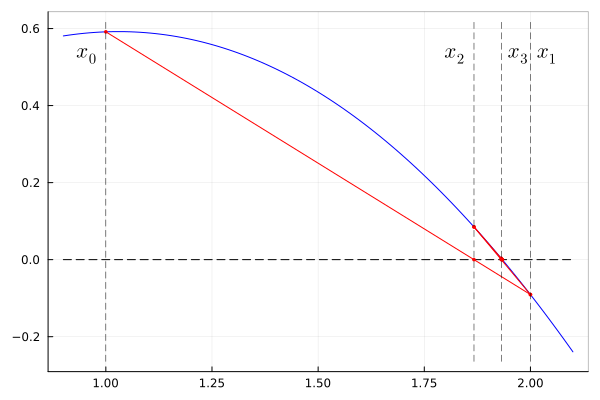

"/home/dawiderter/Projects/Studies/scientific_computing/lista_3/plots/sec_sinx-x^2.svg"

In [28]:
f(x) = sin(x) - (x/2)^2

plt = msiecznych_plot(f,1.0, 2.0, 0.9,2.1,4)

display(plt)

savefig(plt, "./plots/sec_sinx-x^2.svg")

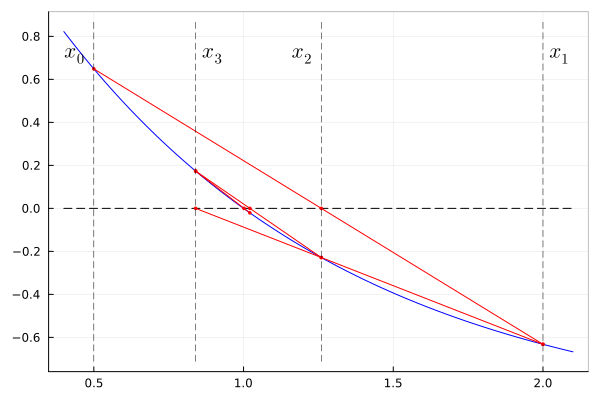

"/home/dawiderter/Projects/Studies/scientific_computing/lista_3/plots/sec_e1-x.svg"

In [109]:
f(x) = ℯ^(1-x) - 1

plt = msiecznych_plot(f,0.5, 2.0, 0.4 ,2.1,4)

display(plt)

savefig(plt, "./plots/sec_e1-x.svg")

In [38]:
f(x) = sin(x) - (x/2)^2
fp(x) = cos(x) - x/2

l_arr, m_arr, r_arr = mbisekcji_arr(f, 1.5, 2.0, 0.5e-5, 0.5e-5)
nx_arr = mstycznych_arr(f, fp, 1.5, 0.5e-5, 0.5e-5, 20)
sx0_arr, sx1_arr = msiecznych_arr(f, 1.0, 2.0, 0.5e-5, 0.5e-5, 20)

max_it = max(length(m_arr), length(nx_arr), length(sx0_arr))

for i in 1:max_it
    println("\$$(i-1)\$,\$$(m_arr[min(i, end)])\$,\$$(nx_arr[min(i, end)])\$,\$$(sx0_arr[min(i, end)])\$,")
end

for i in 1:max_it
    fb = fix_e(abs(f(m_arr[min(i,end)])))
    fn = fix_e(abs(f(nx_arr[min(i,end)])))
    fs = fix_e(abs(f(sx0_arr[min(i,end)])))

    println("\$$(i-1)\$,\$$fb\$,\$$fn\$,\$$fs\$,")
end

$0$,$1.75$,$1.5$,$2.0$,
$1$,$1.875$,$2.1403927723880054$,$1.8670388611329274$,
$2$,$1.9375$,$1.952008946405626$,$1.9313545683871074$,
$3$,$1.90625$,$1.933930573929843$,$1.9338445267485187$,
$4$,$1.921875$,$1.933753779789742$,$1.933753644474301$,
$5$,$1.9296875$,$1.933753779789742$,$1.933753644474301$,
$6$,$1.93359375$,$1.933753779789742$,$1.933753644474301$,
$7$,$1.935546875$,$1.933753779789742$,$1.933753644474301$,
$8$,$1.9345703125$,$1.933753779789742$,$1.933753644474301$,
$9$,$1.93408203125$,$1.933753779789742$,$1.933753644474301$,
$10$,$1.933837890625$,$1.933753779789742$,$1.933753644474301$,
$11$,$1.9337158203125$,$1.933753779789742$,$1.933753644474301$,
$12$,$1.93377685546875$,$1.933753779789742$,$1.933753644474301$,
$13$,$1.933746337890625$,$1.933753779789742$,$1.933753644474301$,
$14$,$1.9337615966796875$,$1.933753779789742$,$1.933753644474301$,
$15$,$1.9337539672851562$,$1.933753779789742$,$1.933753644474301$,
$0$$0.218361$,$0.434995$,$0.0907026$,
$1$$0.0751795$,$0.303202$,$0.

In [40]:
f(x) = 3x - ℯ^x

println(mbisekcji(f,0.0,1.0,1e-4,1e-4))
println(mbisekcji(f,1.0,2.0,1e-4,1e-4))

(0.619140625, 9.066320343276146e-5, 9, 0)
(1.5120849609375, 7.618578602741621e-5, 13, 0)


In [45]:
using Plots
rang = range(0.0,3.0,100)
f(x) = ℯ^(1-x) - 1
plot(rang, f.(rang), legend = false)
plot!([0.0,3.0], [0, 0], ls = :dash, lc = :black)
savefig("./plots/pl_e1-x.svg")

"/home/dawiderter/Projects/Studies/scientific_computing/lista_3/plots/pl_e1-x.svg"

In [48]:
using Plots
rang = range(-0.5,5.0,100)
f(x) = x * ℯ^(-x)
plot(rang, f.(rang), legend = false)
plot!([-0.5,5.0], [0, 0], ls = :dash, lc = :black)
savefig("./plots/pl_xe-x.svg")

"/home/dawiderter/Projects/Studies/scientific_computing/lista_3/plots/pl_xe-x.svg"

In [51]:
f(x) = ℯ^(1-x) - 1
delta = 1e-5
epsilon = 1e-5

data = [[0.0, 3.0], [-10.0, 20.0], [-100.0,200.0], [-10e10, 20e10]]

for d in data
    r,v,it,err = mbisekcji(f,d[1],d[2],delta,epsilon)
    println("$(d[1]), $(d[2]), $r, $v, $it, $err")
end


0.0, 3.0, 1.0000076293945312, -7.6293654275305656e-6, 17, 0
-10.0, 20.0, 1.0000038146972656, -3.814689989667386e-6, 19, 0
-100.0, 200.0, 0.999993085861206, 6.9141626966029435e-6, 24, 0
-1.0e11, 2.0e11, 0.9999945316252479, 5.4683897037222096e-6, 54, 0


In [75]:
f(x) = ℯ^(1-x) - 1
delta = 1e-5
epsilon = 1e-5

data = [[-1.0, 0.0], [0.0, 0.5], [1.5,2.0], [3.0,5.0], [10.0,15.0]]
#data = [[7.0,10.0]]

for d in data
    r,v,it,err = msiecznych(f,d[1],d[2],delta,epsilon, 500)
    println("\$$(d[1])\$,\$$(d[2])\$,\$$r\$,\$$(fix_e(v))\$,\$$it\$,")
end


$-1.0$,$0.0$,$0.9999990043764041$,$9.95624 dot 10^(-7)$,$6$,
$0.0$,$0.5$,$0.9999998133327657$,$1.86667 dot 10^(-7)$,$5$,
$1.5$,$2.0$,$1.0000034269838276$,$-3.42698 dot 10^(-6)$,$5$,
$3.0$,$5.0$,$1.0000002553381668$,$-2.55338 dot 10^(-7)$,$21$,
$10.0$,$15.0$,$10.0$,$-0.999877$,$2$,


In [59]:
f(x) = ℯ^(1-x) - 1
fp(x) = -ℯ^(1 - x)
delta = 1e-5
epsilon = 1e-5

data = [-2.0, 0.0, 2.0, 4.0, 7.0, 8.0]

for d in data
    r,v,it,err = mstycznych(f,fp,d,delta,epsilon,500)
    println("\$$d\$,\$$r\$,\$$(fix_e(v))\$,\$$it\$,")
end


$-2.0$,$0.9999999999251376$,$7.48626 dot 10^(-11)$,$7$,
$0.0$,$0.9999984358892101$,$1.56411 dot 10^(-6)$,$4$,
$2.0$,$0.9999999810061002$,$1.89939 dot 10^(-8)$,$5$,
$4.0$,$0.9999999995278234$,$4.72177 dot 10^(-10)$,$21$,
$7.0$,$0.9999999484165362$,$5.15835 dot 10^(-8)$,$401$,
$8.0$,$NaN$,$NaN$,$500$,


In [80]:
f(x) = x * ℯ^(-x)
delta = 1e-5
epsilon = 1e-5

data = [[-1.0, 2.0], [-10.0, 20.0], [-100.0,200.0]]

for d in data
    r,v,it,err = mbisekcji(f,d[1],d[2],delta,epsilon)
    println("\$$(d[1])\$,\$$(d[2])\$,\$$r\$,\$$(fix_e(v))\$,\$$it\$,")
end

$-1.0$,$2.0$,$7.62939453125e-6$,$7.62934 dot 10^(-6)$,$17$,
$-10.0$,$20.0$,$-9.5367431640625e-6$,$-9.53683 dot 10^(-6)$,$20$,
$-100.0$,$200.0$,$50.0$,$9.64375 dot 10^(-21)$,$1$,


In [86]:
f(x) = x * ℯ^(-x)
fp(x) = (ℯ^(-x)) * (1 - x)
delta = 1e-5
epsilon = 1e-5

data = [-1.0, 0.99, 1.0, 1.01, 1.5]

for d in data
    r,v,it,err = mstycznych(f,fp,d,delta,epsilon,500)
    println("\$$d\$,\$$(fix_e(r))\$,\$$(fix_e(v))\$,\$$it\$,")
end


$-1.0$,$-3.06425 dot 10^(-7)$,$-3.06425 dot 10^(-7)$,$5$,
$0.99$,$-3.99833 dot 10^(-6)$,$-3.99835 dot 10^(-6)$,$107$,
$1.0$,$NaN$,$NaN$,$500$,
$1.01$,$102.01$,$5.08467 dot 10^(-43)$,$1$,
$1.5$,$14.7874$,$5.59488 dot 10^(-6)$,$10$,


In [89]:
f(x) = x * ℯ^(-x)
delta = 1e-5
epsilon = 1e-5

data = [[-1.0, -0.5], [0.5, 1.0], [0.5, 2.0], [1.0, 2.0]]
#data = [[7.0,10.0]]

for d in data
    r,v,it,err = msiecznych(f,d[1],d[2],delta,epsilon, 500)
    println("\$$(d[1]), $(d[2])\$,\$$(fix_e(r))\$,\$$(fix_e(v))\$,\$$it\$,")
end

$-1.0, -0.5$,$-1.223 dot 10^(-7)$,$-1.223 dot 10^(-7)$,$6$,
$0.5, 1.0$,$8.7669 dot 10^(-8)$,$8.7669 dot 10^(-8)$,$9$,
$0.5, 2.0$,$14.4562$,$7.61762 dot 10^(-6)$,$1$,
$1.0, 2.0$,$14.7877$,$5.59375 dot 10^(-6)$,$14$,


In [170]:
using Plots
using LaTeXStrings

f(x) = x * ℯ^(-x)
fp(x) = (ℯ^(-x)) * (1 - x)
delta = 1e-5
epsilon = 1e-5

function plot_iterative(x_0, range_start, range_end, plt = nothing)
    g(x) = x - (x * ℯ^(-x))/(ℯ^(-x)*(1-x))
    if plt == nothing
        x_f = range(range_start,range_end,100)
        x_rl = range(range_start,1,100)
        yl = g.(x_rl)
        x_rr = range(1,range_end,100)
        yr = g.(x_rr)
        plt = plot(x_rl,yl, legend = false, lw = 1.5, lc = :blue)
        plot!(x_rr,yr, legend = false, lw = 1.5, lc = :blue)
        plot!(x_f, x_f, legend = false, lw = 1.5, lc = :red)
    end
    arrow_style = arrow(:closed, :head)
    GR.setarrowsize(0.8)
    
    r = x_0

    for i in 1:4
        r_n = g(r)
        plot!(plt, [r, r], [r, r_n], 
            color = :black, ls = :dash, arrow = arrow_style, lw = 0.3, shape = :circle, ms = 1.5)
        plot!(plt, [r, r_n], [r_n, r_n], 
            color = :black, ls = :dash, arrow = arrow_style, lw = 0.3, shape = :circle, ms = 1.5)
        r = r_n
    end
    return plt
end

plot_iterative (generic function with 2 methods)

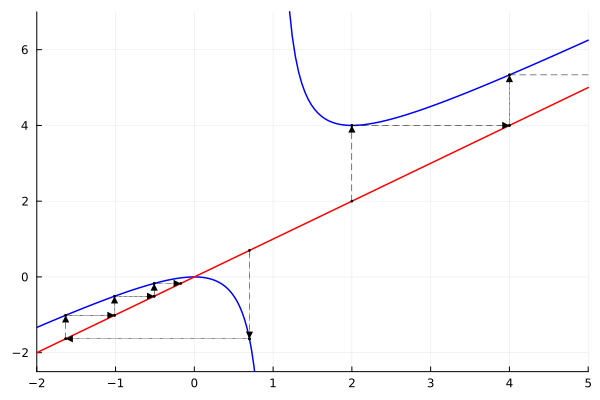

"/home/dawiderter/Projects/Studies/scientific_computing/lista_3/plots/iter_xe-x.svg"

In [176]:
plt = plot_iterative(0.7,-2.0,5.0)
plot_iterative(2.0,-2.0,5.0, plt)
ylims!(-2.5,7.0)
xlims!(-2.0, 5.0)
display(plt)
savefig(plt, "./plots/iter_xe-x.svg")